In [39]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import sympy as sp
from sympy import symbols
from typing import *

from IPython.display import display

In [40]:
%matplotlib inline
sp.init_printing()

# Time Decay Equation

In [41]:
xs = np.linspace(0, 1, 1000)  # domain AND range on [0, 1]

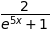

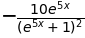

In [42]:
def time_decay(x):
    return 2 / (1 + np.exp(5 * x))

x = symbols('x')
eq = 2 / (1 + sp.exp(5 * x))
display(eq)
display(sp.diff(eq))

def time_decay_p(x):
    return (-10 * np.exp(5 * x)) / ((np.exp(5 * x) + 1)**2)

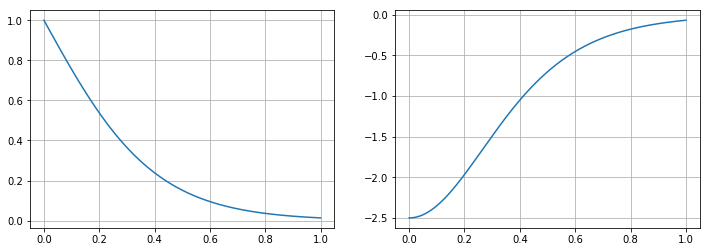

In [43]:
fig, axarr = plt.subplots(1, 2, figsize=(12, 4))
axarr[0].plot(xs, time_decay(xs))
axarr[1].plot(xs, time_decay_p(xs))
axarr[0].grid('on')
axarr[1].grid('on')
plt.savefig('timedecay.png')

# Adaptation

In [44]:
def time_decay(score: float, jump_dist: float, rate_parameter: Optional[float]=1.0) -> float:
    """
    This function is in charge of performing any time decay that needs to happen...

    We're gonna use the same equation for every decaying score

    rate parameter changes the shape of this thing.

    BASICALLY JUST RK1 HILARIOUSLY
    """
    # TODO: Pics
    def decay_func(x):
        return 2 / (1 + np.exp(5 * rate_parameter * x))

    def decay_func_p(x):   # just the derivative of the decay func
        return (-2 * (5 * rate_parameter) * np.exp(5 * rate_parameter * x)) / ((np.exp(5 * rate_parameter * x) + 1) ** 2)

    return score + (decay_func_p(score) * jump_dist)

In [45]:
x = 1
xs = []
while x > 0.1:
    xs.append(x)
    x = time_decay(x, 1)

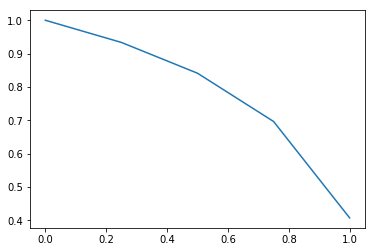

In [46]:
plt.figure()
plt.plot(np.linspace(0, 1, len(xs)), xs)
plt.savefig('exampledecay.png')